### CS5228 Group 18

### Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Enable "Inline Plotting"

In [2]:
%matplotlib inline

# 1. Exploratory Data Analysis (EDA) - Core Dataset

## 1.1. Loading the Dataset

In [3]:
new_data = pd.read_csv('Datasets/train.csv')
new_data.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


## 1.2 Basic Statistics

In [4]:
# Display basic statistics of the dataset
new_data.describe(include='all')

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
count,60000,60000,60000,60000,60000,60000,60000.000000,60000,60000.000000,60000.000000,60000.000000,60000.0,60000,60000,60000,60000.000000
unique,31,26,2553,1083,9,19,NaN,1,NaN,NaN,NaN,NaN,152,29,5,NaN
top,2021-03,jurong west,102,ang mo kio avenue 3,4-room,model a,NaN,yes,NaN,NaN,NaN,NaN,tampines east,jurong west,west region,NaN
freq,2463,4413,220,480,12840,17122,NaN,60000,NaN,NaN,NaN,NaN,2469,4413,14355,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,94.480458,NaN,1990.876367,1.359443,103.840110,0.0,NaN,NaN,NaN,2590.328333
std,NaN,NaN,NaN,NaN,NaN,NaN,24.082642,NaN,12.141435,0.042505,0.071627,0.0,NaN,NaN,NaN,714.910468
min,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,1966.000000,1.270380,103.685228,0.0,NaN,NaN,NaN,300.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,73.000000,NaN,1981.000000,1.330939,103.778803,0.0,NaN,NaN,NaN,2100.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,93.000000,NaN,1988.000000,1.354024,103.845301,0.0,NaN,NaN,NaN,2400.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,110.000000,NaN,2000.000000,1.386968,103.897418,0.0,NaN,NaN,NaN,3000.000000


<AxesSubplot:xlabel='flat_model', ylabel='monthly_rent'>

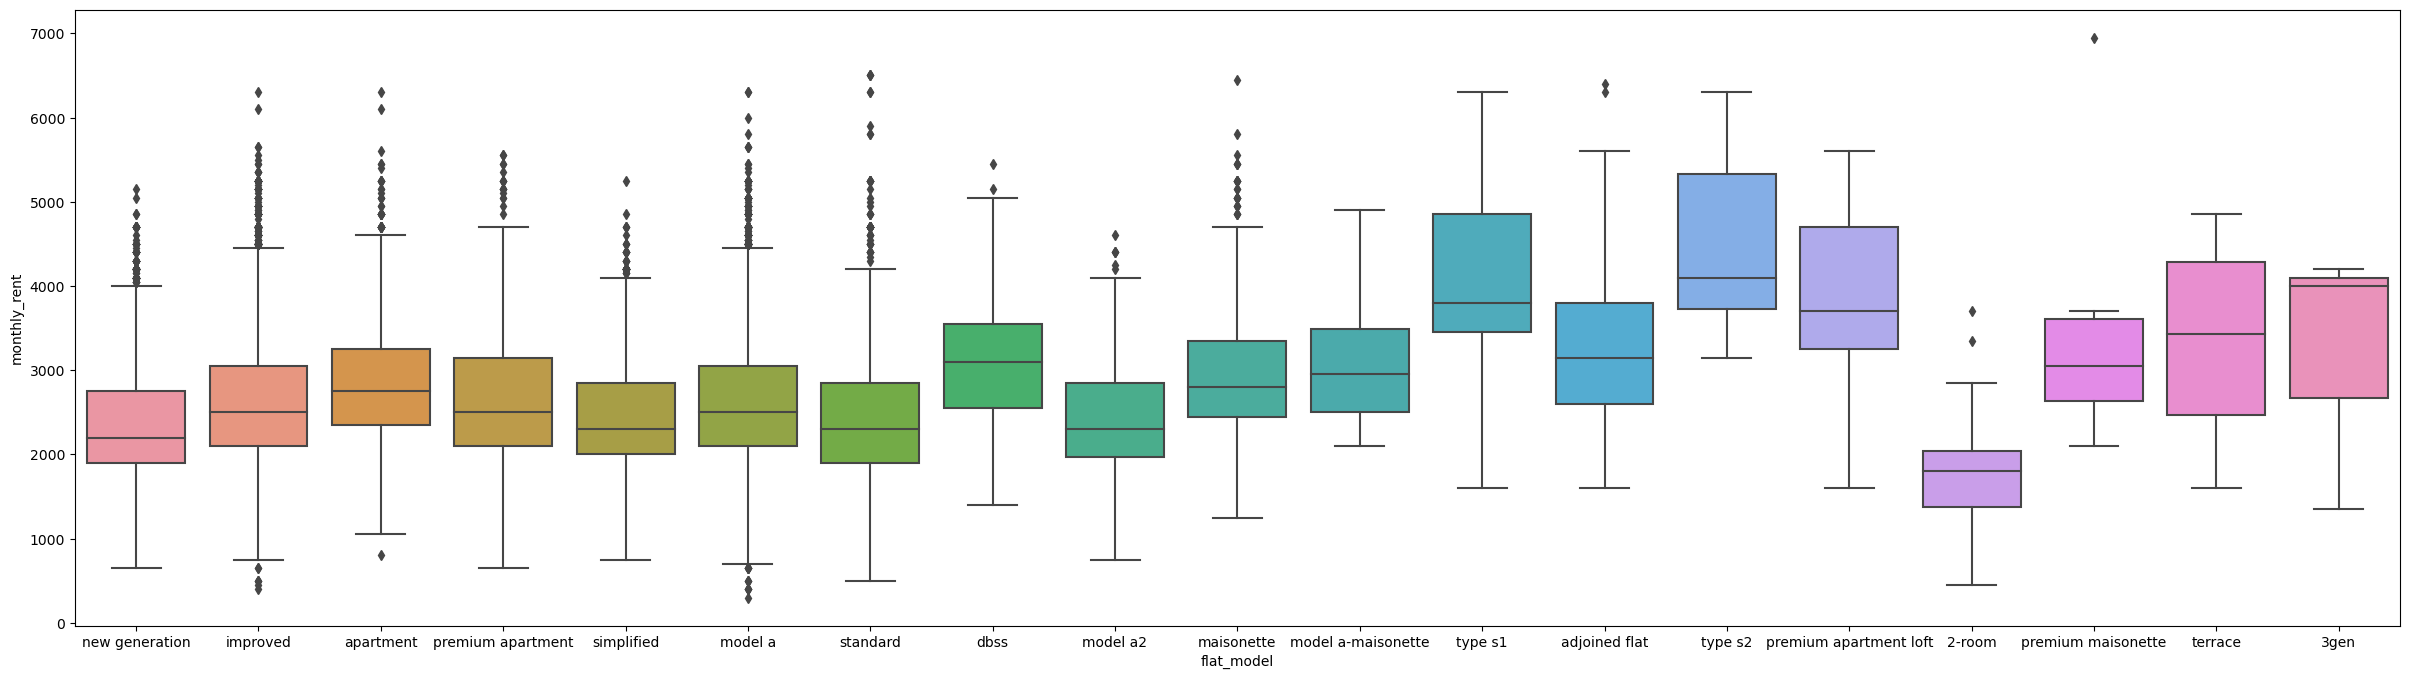

In [5]:
plt.subplots(figsize=(30,8))
sns.boxplot(x=new_data['flat_model'], y=new_data['monthly_rent'])

<AxesSubplot:xlabel='planning_area', ylabel='monthly_rent'>

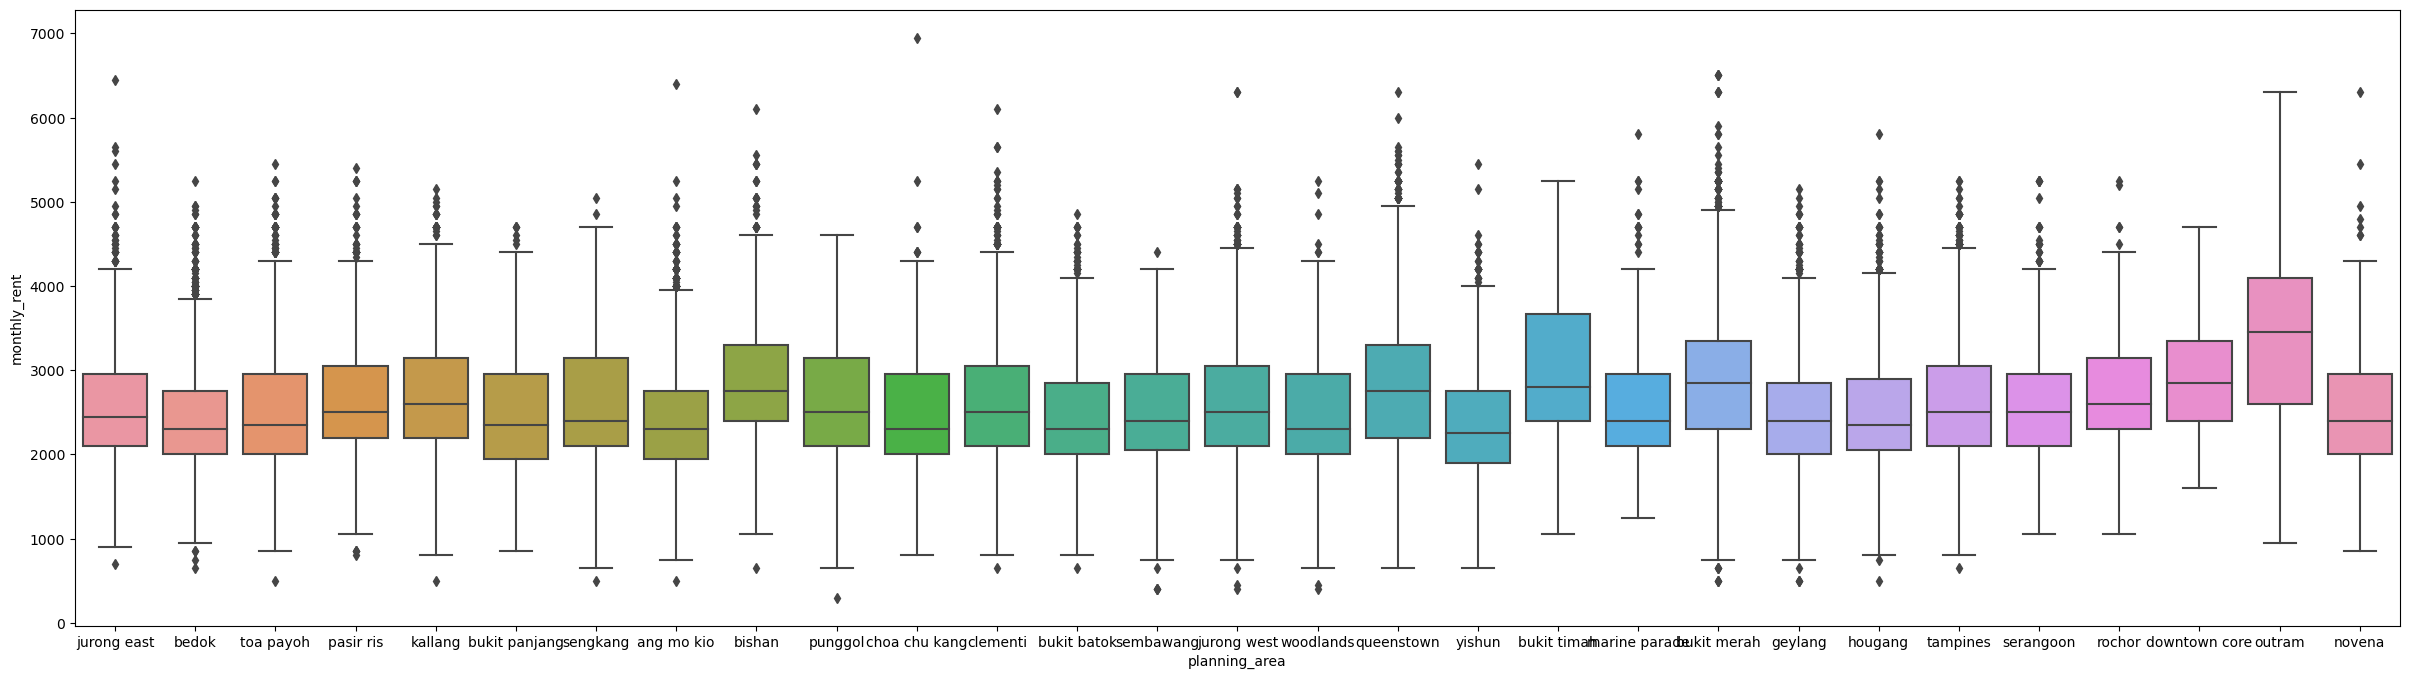

In [6]:
plt.subplots(figsize=(30,8))
sns.boxplot(x=new_data['planning_area'], y=new_data['monthly_rent'])

<AxesSubplot:xlabel='town', ylabel='monthly_rent'>

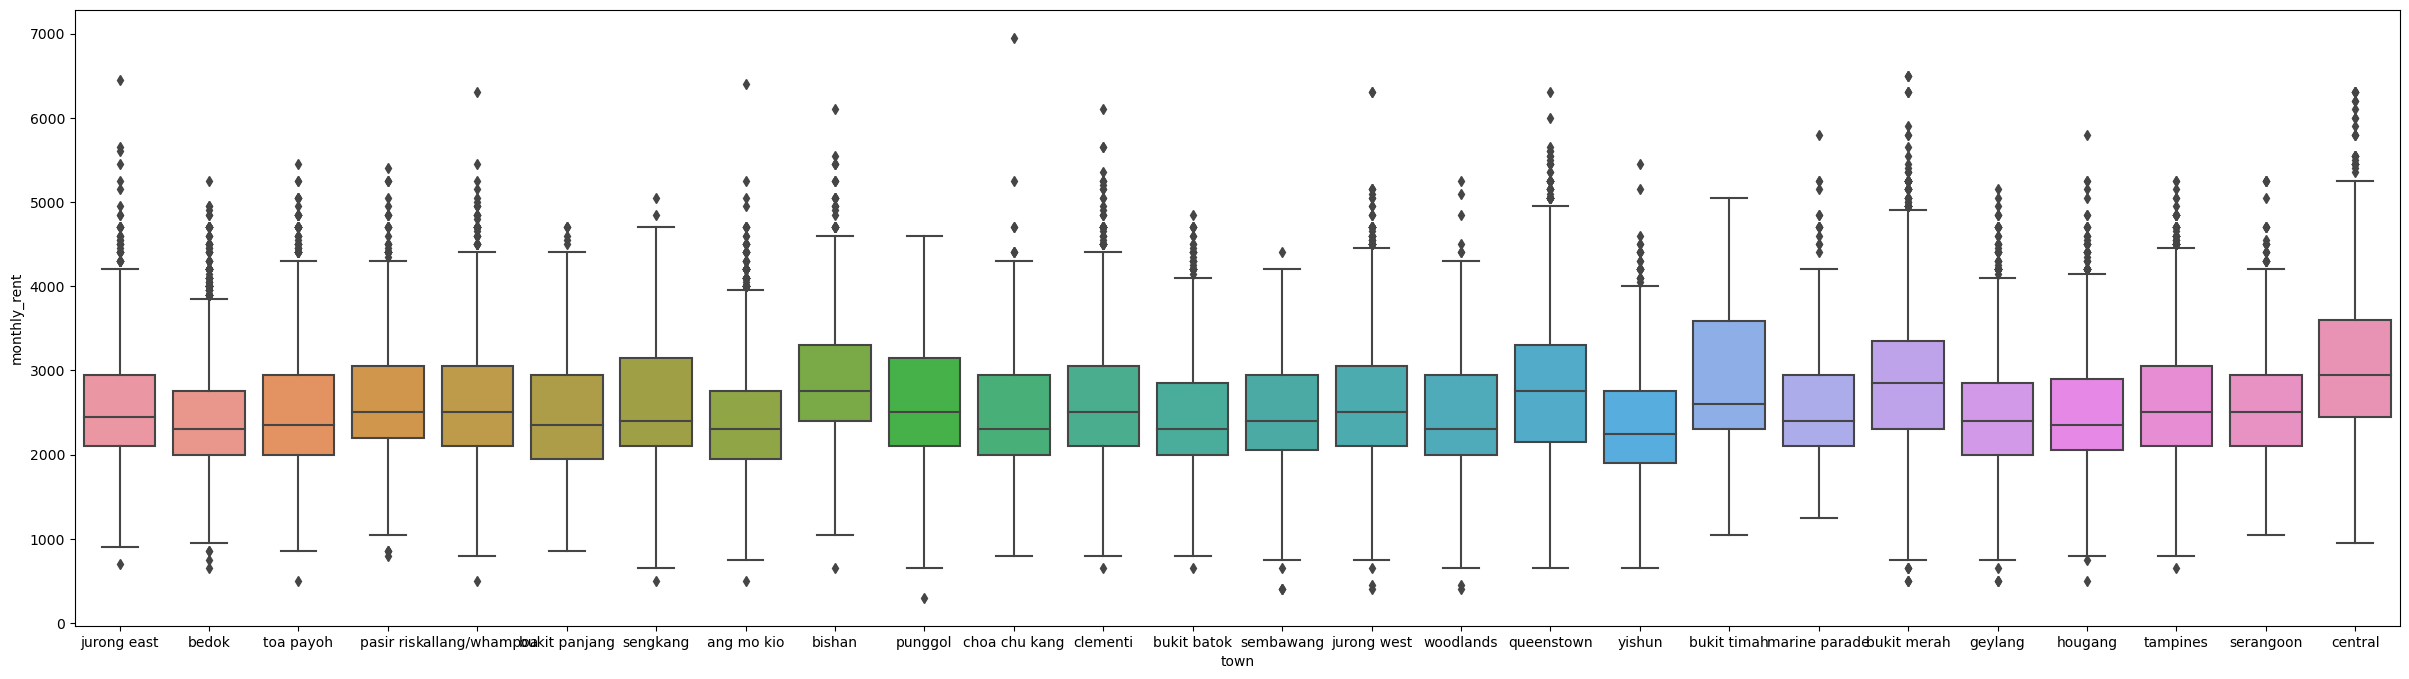

In [7]:
plt.subplots(figsize=(30,8))
sns.boxplot(x=new_data['town'], y=new_data['monthly_rent'])

## 1.3 Check for Missing Values

In [8]:
missing_values_new = new_data.isnull().sum()
missing_values_new

rent_approval_date     0
town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
furnished              0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
monthly_rent           0
dtype: int64

## 1.4 Average Rent by Flat Type

In [9]:
# replace blank space with hyphen in flat_type (e.g. '2 room' to '2-room')
new_data['flat_type'] = new_data['flat_type'].apply(lambda x: x.replace(' ', '-'))

# Calculate the average monthly rent for each flat type
average_rent_by_flat_type_new = new_data.groupby('flat_type')['monthly_rent'].mean().sort_values(ascending=False)
average_rent_by_flat_type_new

flat_type
executive    2892.857143
5-room       2815.593875
4-room       2692.359176
3-room       2276.033233
2-room       1850.161812
Name: monthly_rent, dtype: float64

## 1.5 Average Rent by Flat Model

In [10]:
average_rent_by_flat_model = new_data.groupby('flat_model')['monthly_rent'].mean().sort_values(ascending=False)
average_rent_by_flat_model

flat_model
type s2                   4436.956522
type s1                   4138.425926
premium apartment loft    3760.000000
premium maisonette        3575.000000
adjoined flat             3343.877551
terrace                   3325.000000
3gen                      3183.333333
dbss                      3150.404313
model a-maisonette        3138.392857
maisonette                2978.033473
apartment                 2878.725962
premium apartment         2709.678998
improved                  2636.211052
model a                   2612.031305
simplified                2464.689064
standard                  2444.223986
model a2                  2439.140271
new generation            2369.965462
2-room                    1758.823529
Name: monthly_rent, dtype: float64

## 1.6 Relationship between Floor Area and Rent

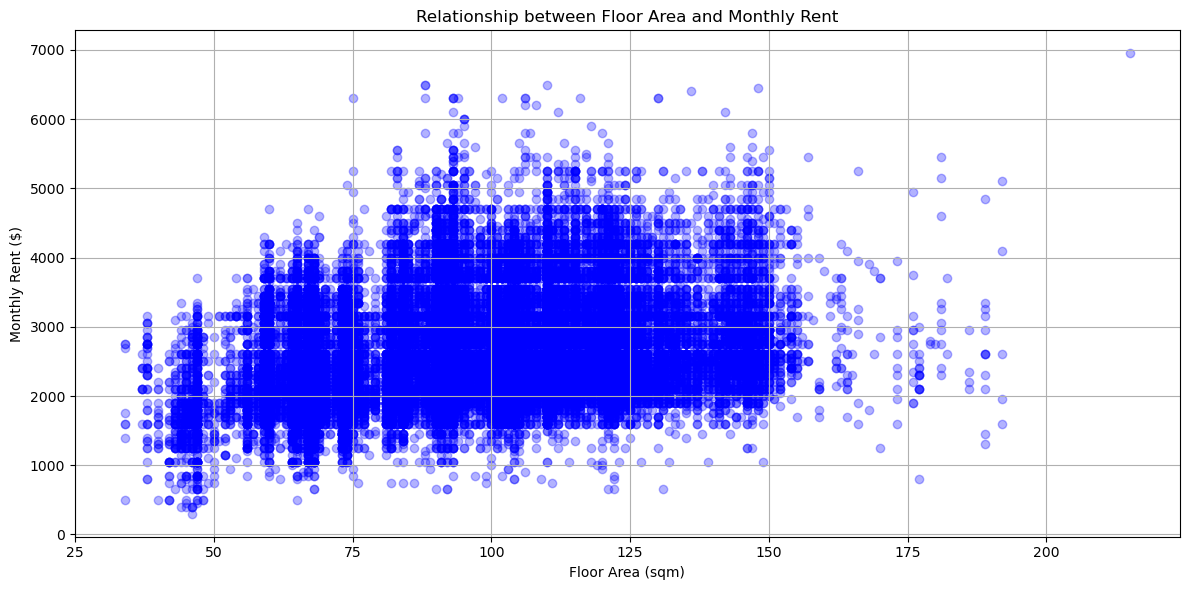

In [11]:
# Plot the relationship between floor area and monthly rent
plt.figure(figsize=(12, 6))
plt.scatter(new_data['floor_area_sqm'], new_data['monthly_rent'], alpha=0.3, color='blue')
plt.title('Relationship between Floor Area and Monthly Rent')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Monthly Rent ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 1.7 Average Rent by Region

In [12]:
# Calculate the average monthly rent for each region
average_rent_by_region = new_data.groupby('region')['monthly_rent'].mean().sort_values(ascending=False)
average_rent_by_region

region
central region       2737.201353
east region          2570.667785
west region          2569.167537
north-east region    2558.822710
north region         2450.623806
Name: monthly_rent, dtype: float64

## 1.8 Handling Uniform Columns

In [13]:
unique_elevation = new_data['elevation'].unique()
unique_elevation


array([0.])

In [14]:
unique_furnished = new_data['furnished'].unique()
unique_furnished

array(['yes'], dtype=object)

In [15]:
def handle_uniform(new_data):
    return new_data.drop(columns=['elevation', 'furnished'])

data_no_uniform = handle_uniform(new_data)
data_no_uniform.head()


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3-room,new generation,67.0,1983,1.344518,103.738630,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,1978,1.330186,103.938717,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,1971,1.332242,103.845643,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,1993,1.370239,103.962894,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,1972,1.320502,103.863341,bendemeer,kallang,central region,2100


## 1.9 Handling Similar Attributes

In [16]:
# Check if 'town' and 'planning_area' have the same unique values
town_unique = data_no_uniform['town'].unique()
planning_area_unique = data_no_uniform['planning_area'].unique()

print("Unique towns:", town_unique)
print("Unique planning areas:", planning_area_unique)


Unique towns: ['jurong east' 'bedok' 'toa payoh' 'pasir ris' 'kallang/whampoa'
 'bukit panjang' 'sengkang' 'ang mo kio' 'bishan' 'punggol'
 'choa chu kang' 'clementi' 'bukit batok' 'sembawang' 'jurong west'
 'woodlands' 'queenstown' 'yishun' 'bukit timah' 'marine parade'
 'bukit merah' 'geylang' 'hougang' 'tampines' 'serangoon' 'central']
Unique planning areas: ['jurong east' 'bedok' 'toa payoh' 'pasir ris' 'kallang' 'bukit panjang'
 'sengkang' 'ang mo kio' 'bishan' 'punggol' 'choa chu kang' 'clementi'
 'bukit batok' 'sembawang' 'jurong west' 'woodlands' 'queenstown' 'yishun'
 'bukit timah' 'marine parade' 'bukit merah' 'geylang' 'hougang'
 'tampines' 'serangoon' 'rochor' 'downtown core' 'outram' 'novena']


In [17]:
# Check if 'town' and 'planning_area' have the same values and count the rows
same_town_and_planning_area = (data_no_uniform['town'] == data_no_uniform['planning_area'])
count_same_values = same_town_and_planning_area.sum()

print("Number of rows with the same 'town' and 'planning_area':", count_same_values)

Number of rows with the same 'town' and 'planning_area': 57517


In [18]:
data_no_uniform.drop(columns=['town'], inplace=True)

## 1.10 Handling Categorical Attributes

In [19]:
import sklearn
import category_encoders as ce

# encoder = ce.TargetEncoder(cols=['subzone'])

# new_data_encoded = encoder.fit_transform(data_no_uniform, data_no_uniform['monthly_rent'])
# new_data_encoded.head()

# Perform one-hot encoding for the categorical columns
categorical_columns = ['planning_area', 'region']
data_encoded = pd.get_dummies(data_no_uniform, columns=categorical_columns)
print(len(data_encoded.columns))
data_encoded.head()


45


,rent_approval_date,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,...,planning_area_serangoon,planning_area_tampines,planning_area_toa payoh,planning_area_woodlands,planning_area_yishun,region_central region,region_east region,region_north region,region_north-east region,region_west region
0,2021-09,257,Jurong East Street 24,3-room,new generation,67.0,1983,1.344518,103.738630,yuhua east,...,0,0,0,0,0,0,0,0,0,1
1,2022-05,119,bedok north road,4-room,new generation,92.0,1978,1.330186,103.938717,bedok north,...,0,0,0,0,0,0,1,0,0,0
2,2022-10,157,lorong 1 toa payoh,3-room,improved,67.0,1971,1.332242,103.845643,toa payoh central,...,0,0,1,0,0,1,0,0,0,0
3,2021-08,250,Pasir Ris Street 21,executive,apartment,149.0,1993,1.370239,103.962894,pasir ris drive,...,0,0,0,0,0,0,1,0,0,0
4,2022-11,34,Whampoa West,3-room,improved,68.0,1972,1.320502,103.863341,bendemeer,...,0,0,0,0,0,1,0,0,0,0


## 1.11 Feature engineering

In [20]:
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in km
    R = 6371.0
    
    # Convert latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    
    return distance


In [21]:
existing_mrt_df = pd.read_csv('Datasets/auxiliary-data/sg-mrt-existing-stations.csv')
shopping_malls_df = pd.read_csv('Datasets/auxiliary-data/sg-shopping-malls.csv')
primary_schools_df = pd.read_csv('Datasets/auxiliary-data/sg-primary-schools.csv')

# Calculate distances to existing MRT stations
property_latitudes = data_encoded['latitude'].values
property_longitudes = data_encoded['longitude'].values
existing_mrt_latitudes = existing_mrt_df['latitude'].values
existing_mrt_longitudes = existing_mrt_df['longitude'].values
shopping_malls_latitudes = shopping_malls_df['latitude'].values
shopping_malls_longitudes = shopping_malls_df['longitude'].values
primary_schools_latitudes = primary_schools_df['latitude'].values
primary_schools_longitudes = primary_schools_df['longitude'].values
# planned_mrt_latitudes = planned_mrt_df['latitude'].values
# planned_mrt_longitudes = planned_mrt_df['longitude'].values

# Calculate distances
distances_to_existing_mrt = haversine(
    property_latitudes[:, np.newaxis], property_longitudes[:, np.newaxis],
    existing_mrt_latitudes, existing_mrt_longitudes
)

distances_to_shopping_malls = haversine(
    property_latitudes[:, np.newaxis], property_longitudes[:, np.newaxis],
    shopping_malls_latitudes, shopping_malls_longitudes
)

distances_to_primary_schools = haversine(
    property_latitudes[:, np.newaxis], property_longitudes[:, np.newaxis],
    primary_schools_latitudes, primary_schools_longitudes
)

# distances_to_planned_mrt = haversine(
#     property_latitudes[:, np.newaxis], property_longitudes[:, np.newaxis],
#     planned_mrt_latitudes, planned_mrt_longitudes
# )

# Find the minimum distances
min_distances_to_existing_mrt = np.min(distances_to_existing_mrt, axis=1)
min_distances_to_shopping_mall = np.min(distances_to_shopping_malls, axis=1)
min_distances_to_primary_school = np.min(distances_to_primary_schools, axis=1)

# Add the minimum distance as new features 'distance_to_nearest_existing_mrt', 'distance_to_nearest_shopping_mall', 'distance_to_nearest_primary_school'
data_encoded['distance_to_nearest_existing_mrt'] = min_distances_to_existing_mrt
data_encoded['distance_to_nearest_shopping_mall'] = min_distances_to_shopping_mall
data_encoded['distance_to_nearest_primary_school'] = min_distances_to_primary_school

data_encoded.head()

,rent_approval_date,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,...,planning_area_woodlands,planning_area_yishun,region_central region,region_east region,region_north region,region_north-east region,region_west region,distance_to_nearest_existing_mrt,distance_to_nearest_shopping_mall,distance_to_nearest_primary_school
0,2021-09,257,Jurong East Street 24,3-room,new generation,67.0,1983,1.344518,103.738630,yuhua east,...,0,0,0,0,0,0,1,0.699127,1.202674,0.334846
1,2022-05,119,bedok north road,4-room,new generation,92.0,1978,1.330186,103.938717,bedok north,...,0,0,0,1,0,0,0,0.898991,1.114338,0.607716
2,2022-10,157,lorong 1 toa payoh,3-room,improved,67.0,1971,1.332242,103.845643,toa payoh central,...,0,0,1,0,0,0,0,0.218603,0.468297,0.425760
3,2021-08,250,Pasir Ris Street 21,executive,apartment,149.0,1993,1.370239,103.962894,pasir ris drive,...,0,0,0,1,0,0,0,1.546040,0.402359,0.564969
4,2022-11,34,Whampoa West,3-room,improved,68.0,1972,1.320502,103.863341,bendemeer,...,0,0,1,0,0,0,0,0.187856,1.073354,0.271723


In [22]:
coe_prices_df = pd.read_csv('Datasets/auxiliary-data/sg-coe-prices.csv')

# Define a mapping of month names to numeric values
month_mapping = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4, 'may': 5, 'june': 6,
    'july': 7, 'august': 8, 'september': 9, 'october': 10, 'november': 11, 'december': 12
}
coe_prices_df['month'] = coe_prices_df['month'].str.lower().map(month_mapping)

# Convert year, category, and month to a single datetime column
coe_prices_df['year_month'] = pd.to_datetime(coe_prices_df[['year', 'month']].assign(day=1))

# Format the 'year_month' column as YYYY-MM
coe_prices_df['year_month'] = coe_prices_df['year_month'].dt.strftime('%Y-%m')

# Group by the 'year_month' column and calculate the average COE price for each group
average_coe_prices = coe_prices_df.groupby('year_month')['price'].mean().reset_index()
average_coe_prices.rename(columns={'price' : 'average_coe_price'}, inplace=True)

# Merge the main training dataset with average COE prices based on 'rent_approval_date'
data_with_coe = data_encoded.merge(
    average_coe_prices[['year_month', 'average_coe_price']],
    left_on='rent_approval_date',
    right_on='year_month',
    how='left',
)

data_with_coe.drop(columns='year_month', inplace=True)
data_with_coe


,rent_approval_date,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,...,planning_area_yishun,region_central region,region_east region,region_north region,region_north-east region,region_west region,distance_to_nearest_existing_mrt,distance_to_nearest_shopping_mall,distance_to_nearest_primary_school,average_coe_price
0,2021-09,257,Jurong East Street 24,3-room,new generation,67.0,1983,1.344518,103.738630,yuhua east,...,0,0,0,0,0,1,0.699127,1.202674,0.334846,54951.625
1,2022-05,119,bedok north road,4-room,new generation,92.0,1978,1.330186,103.938717,bedok north,...,0,0,1,0,0,0,0.898991,1.114338,0.607716,77035.625
2,2022-10,157,lorong 1 toa payoh,3-room,improved,67.0,1971,1.332242,103.845643,toa payoh central,...,0,1,0,0,0,0,0.218603,0.468297,0.425760,89580.250
3,2021-08,250,Pasir Ris Street 21,executive,apartment,149.0,1993,1.370239,103.962894,pasir ris drive,...,0,0,1,0,0,0,1.546040,0.402359,0.564969,51997.375
4,2022-11,34,Whampoa West,3-room,improved,68.0,1972,1.320502,103.863341,bendemeer,...,0,1,0,0,0,0,0.187856,1.073354,0.271723,99472.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2021-09,441,Ang Mo Kio Avenue 10,3-room,new generation,67.0,1979,1.366050,103.854168,chong boon,...,0,0,0,0,1,0,0.670095,0.949719,0.360651,54951.625
59996,2023-04,95a,henderson road,4-room,model a,83.0,2019,1.286493,103.821434,henderson hill,...,0,1,0,0,0,0,0.619569,0.740674,0.562691,104404.750
59997,2022-06,862a,tampines street 83,5-room,improved,122.0,1988,1.355064,103.936507,tampines west,...,0,0,1,0,0,0,0.722926,0.439795,0.320031,83323.125
59998,2023-01,67,Bedok Sth Avenue 3,5-room,standard,123.0,1977,1.318974,103.944076,bedok south,...,0,0,1,0,0,0,0.923539,1.775198,0.219549,92845.000


In [23]:
# add two new attributes, split rent_approval_date into month, year

data_with_coe[['rent_approval_year','rent_approval_month']] = data_with_coe['rent_approval_date'].str.split('-',expand=True)

ordinal_mapping = {
    'executive': 5,
    '5-room': 4,
    '4-room': 3,
    '3-room': 2,
    '2-room': 1
}

data_with_coe['flat_type_encoded'] = data_with_coe['flat_type'].map(ordinal_mapping)

def date_filter_condition(x):
    
    if x < 1970:
        return 'before 70s'
    elif x >= 1970 and x < 1980:
        return '70s'
    elif x >= 1980 and x < 1990:
        return '80s'
    elif x >= 1990 and x < 2000:
        return '90s'
    elif x >= 2000 and x < 2010:
        return '00s'
    elif x >= 2010 and x < 2020:
        return '10s'
    else:
        return 'others'

# categorize lease commence date by decades    
data_with_coe['lease_date_cat'] = data_with_coe['lease_commence_date'].apply(date_filter_condition)

In [24]:
print(data_with_coe.columns)

Index(['rent_approval_date', 'block', 'street_name', 'flat_type', 'flat_model',
       'floor_area_sqm', 'lease_commence_date', 'latitude', 'longitude',
       'subzone', 'monthly_rent', 'planning_area_ang mo kio',
       'planning_area_bedok', 'planning_area_bishan',
       'planning_area_bukit batok', 'planning_area_bukit merah',
       'planning_area_bukit panjang', 'planning_area_bukit timah',
       'planning_area_choa chu kang', 'planning_area_clementi',
       'planning_area_downtown core', 'planning_area_geylang',
       'planning_area_hougang', 'planning_area_jurong east',
       'planning_area_jurong west', 'planning_area_kallang',
       'planning_area_marine parade', 'planning_area_novena',
       'planning_area_outram', 'planning_area_pasir ris',
       'planning_area_punggol', 'planning_area_queenstown',
       'planning_area_rochor', 'planning_area_sembawang',
       'planning_area_sengkang', 'planning_area_serangoon',
       'planning_area_tampines', 'planning_area_toa 

In [25]:
data_with_coe.to_csv('Datasets/train_cleaned.csv', index=False)